# Qustion 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, random
import scipy.stats as stats

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

In [2]:
df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")

In [3]:
df

,player_ID,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,...,gk_reflexes,gk_handling,gk_speed,gk_kicking,gk_positoning,pref_foot,att_workrate,def_workrate,weak_foot,skill_moves
0,1,Pelé,Edson Arantes Nascimento,Gold - Rare,Icon,NaN,98,Icons,Icons,Brazil,...,NaN,NaN,NaN,NaN,NaN,Right,High,Med,4,5
1,2,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,97,Icons,Icons,Argentina,...,NaN,NaN,NaN,NaN,NaN,Left,High,Med,3,5
2,3,Ronaldo,Ronaldo Luís Nazário de Lima,Gold - Rare,Icon,NaN,96,Icons,Icons,Brazil,...,NaN,NaN,NaN,NaN,NaN,Right,Med,Med,5,5
3,4,Pelé,Edson Arantes Nascimento,Gold - Rare,Icon,NaN,95,Icons,Icons,Brazil,...,NaN,NaN,NaN,NaN,NaN,Right,High,Med,4,5
4,5,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,95,Icons,Icons,Argentina,...,NaN,NaN,NaN,NaN,NaN,Left,High,Med,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,21632,Batshuayi,Michy Batshuayi,Gold - Rare,FIF,TOTW46,88,Valencia CF,LaLiga Santander,Belgium,...,NaN,NaN,NaN,NaN,NaN,Right,Med,Low,4,3
21557,21633,En-Nesyri,Youssef En-Nesyri,Gold - Rare,IF,TOTW46,77,Málaga CF,LaLiga Santander,Morocco,...,NaN,NaN,NaN,NaN,NaN,Right,Med,Med,4,3
21558,21634,Areola,Alphonse Areola,Gold - Rare,TIF,TOTW46,86,Paris Saint-Germain,Ligue 1 Conforama,France,...,90.0,87.0,65.0,80.0,85.0,Right,Med,Med,3,1
21559,21635,Vargas,Camilo Vargas,Gold - Rare,IF,TOTW46,81,Deportivo Cali,Liga Dimayor,Colombia,...,83.0,80.0,47.0,68.0,75.0,Left,Med,Med,3,1


In [4]:
mean = df['pace'].mean()
df['pace'] = df['pace'].fillna(mean)
mean = df['dribbling'].mean()
df['dribbling'] = df['dribbling'].fillna(mean)

'\n42\n30\n26\n23\n17\n'

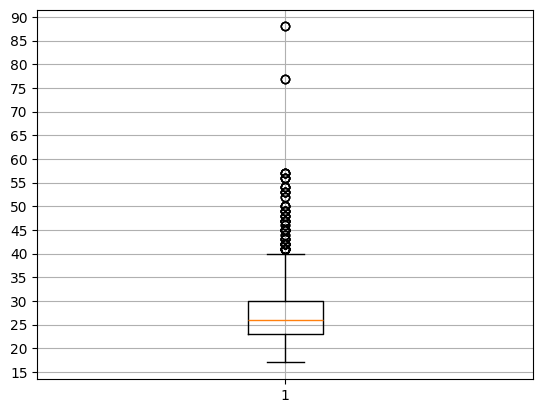

In [5]:
plt.boxplot(df['age'])
plt.yticks(range(15, 91, 5))
plt.grid(True)
'''
42
30
26
23
17
'''

In [12]:
def part_3(n):
    set_seed(810109203)
    random_data = df['weight'].sample(n=n, replace=False)
    print("mean:",np.mean(random_data))
    print("var:",np.var(random_data))
    print("std:",np.std(random_data))
    
    statistic, p_value = stats.shapiro(random_data)
    print("p_value:", p_value)

    sample = np.random.normal(np.mean(random_data), np.std(random_data), n)
    quantiles_norm = np.percentile(sample, np.arange(0, 100, 5))
    quantiles_data = np.percentile(random_data, np.arange(0, 100, 5))
    plt.plot(quantiles_norm, quantiles_data, marker='o', linestyle='None')
    plt.plot([min(quantiles_norm), max(quantiles_norm)], [min(quantiles_data), max(quantiles_data)], color='red')
    plt.xlabel('quantiles of norm')
    plt.ylabel('quantiles of data')
    plt.title('Q-Q Plot')
    plt.text(70, 78, f'n: {n}\nMean: {np.mean(random_data):.2f}\nVariance: {np.var(random_data):.2f}\nStd: {np.std(random_data):.2f}\nP_value: {p_value:.3f}', ha='right', va='bottom')
    plt.grid(True)
    plt.show()

mean: 76.7
var: 53.07
std: 7.284915922644544
p_value: 0.5503065586090088


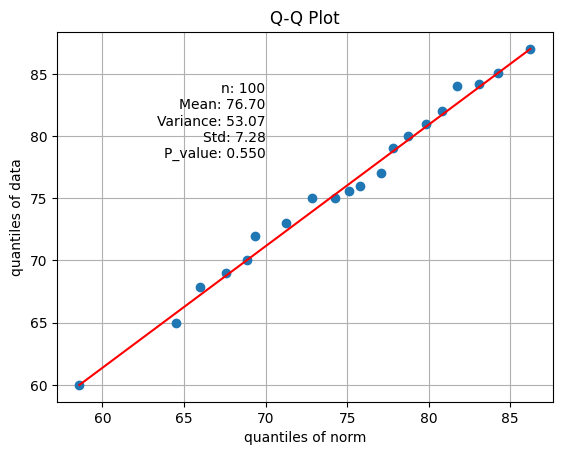

mean: 76.0
var: 54.236
std: 7.364509488078618
p_value: 0.0013178142253309488


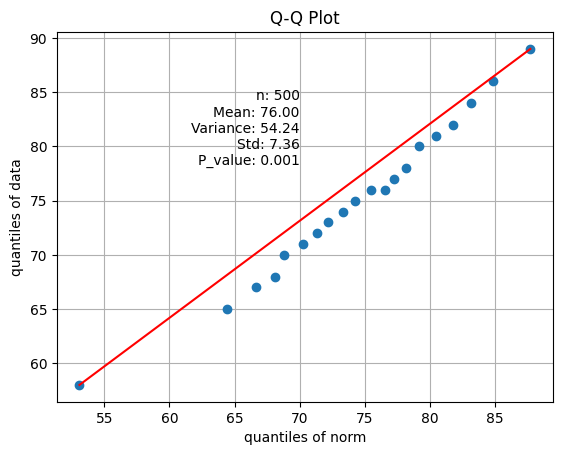

mean: 75.548
var: 51.687695999999995
std: 7.189415553436872
p_value: 2.6769496841438922e-08


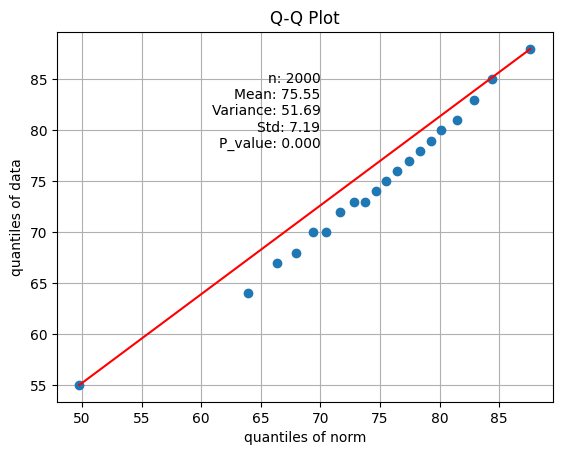

In [13]:
part_3(100)
part_3(500)
part_3(2000)